In [80]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from pandas import DataFrame

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr

from itertools import combinations

In [2]:
my_dpi = 200
font_path = "../data_visualization/NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data('apple_quality')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기 : {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 데이터 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/kaggle/apple_quality.xlsx
[desc] 이 데이터 세트는 다양한 과일 속성에 대한 정보를 담고 있어 과일의 특성을 파악하는 데 도움이 됩니다. 데이터 세트에는 과일 ID, 크기, 무게, 당도, 아삭함, 과즙량, 숙성도, 산도 및 품질과 같은 세부 정보가 포함되어 있습니다. (출처: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

field        description
-----------  ----------------------------------
A_id         각 과일에 대한 고유 식별자
Size         크기
Weight       무게
Sweetness    단맛 정도
Crunchiness  과일의 아삭한 식감을 나타내는 질감
Juiciness    과일의 과즙 함량 정도
Ripeness     과일이 익은 정도
Acidity      과일의 산도 수준
Quality      과일의 전반적인 품질


===== 데이터 크기 확인 =====
데이터셋 크기 : (4000, 9)
열 개수: 9
행 개수: 4000

===== 데이터 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4  

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


### 1. 데이터의 전체 구조 확인
- 1. 데이터의 전체 구조를 확인하자.
    - 관측치 수
    - 변수 타입(연속형 / 범주형)
- 2. 아직 분석을 하지 않은 상태에서 중요해 보이는 변수를 직관적으로 예측해보자.

In [4]:
origin.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [5]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


- 관측치 수 - 4000개, 빈 값 없음
- 변수 타입(연속형 8개, 범주형 1개(Quality))
- 직관적으로 중요해 보이는 변수 
    - Size, Weight, Ripeness (크기, 무게, 익은 정도)

### 2. 목표 변수 시각화
- 1. Quality의 분포를 막대그래프로 시각화하자.
- 2. 좋은 사과와 그렇지 않은 사과의 비율을 확인하자.
- 3. 이 분포를 보고 정확도 하나만으로 모델을 평가해도 괜찮을지 고민해 보자.

In [6]:
df = origin.copy()

In [40]:
df.value_counts('Quality')

Quality
good    2004
bad     1996
Name: count, dtype: int64

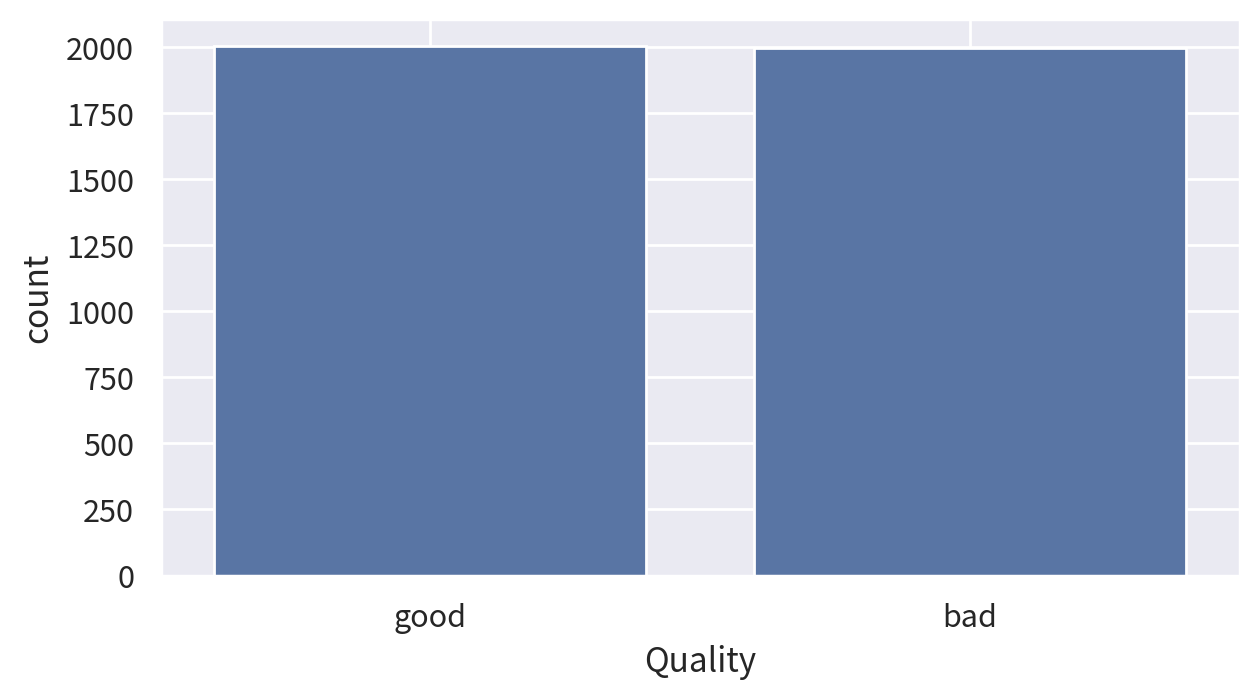

In [20]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) barplot 그리기
sb.countplot(
    data=df,
    x='Quality',
)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- Good의 경우 2004개, bad의 경우 1996개로 데이터 총 4000건에서 8개 차이로 품질 분포가 50% 가까운 모습이다.
- Good = 50.1% , bad = 49.9%
- 분포만 봐서는 좋을지 나쁠지는 반반이기 때문에 정확도 하나만으로는 모델을 평가하면 안될 것 같은 느낌!
    - ~~50%면 그냥 어린애가 저거 맛있어보인다 하는 그런 느낌~~

### 3단계. 단변량 EDA - 사과 하나만 놓고 보았을 때, 무엇이 보일까?
- 1. 히스토그램과 KDE를 그려 분포를 확인하자.
- 2. 왜도(skewness)가 있는 변수를 찾아보자.
- 3. 눈에 띄는 이상치가 있는지 시각적으로 판단하자.

In [25]:
#연속형 변수만 선택하기 위해 범주형 드랍
df2 = df.drop(columns=['Quality'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 250.1 KB


변수별 히스토그램 및 KDE 그리기

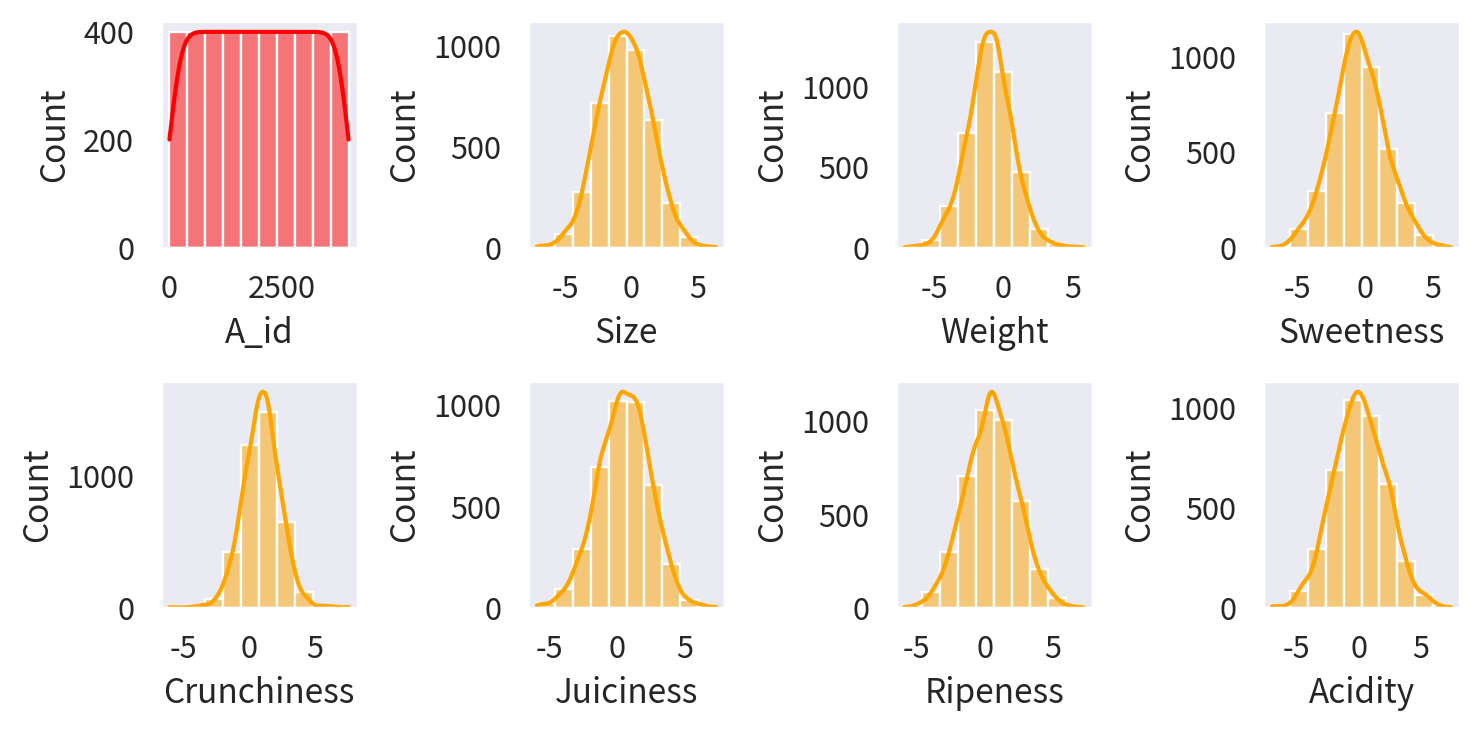

In [36]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1500             #그래프 가로 크기
height_px = 750             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 4                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=df2, x='A_id', bins=10, kde=True, color='red', ax=ax[0,0])
sb.histplot(data=df2, x='Size', bins=10, kde=True, color='orange', ax=ax[0,1])
sb.histplot(data=df2, x='Weight', bins=10, kde=True, color='orange', ax=ax[0,2])
sb.histplot(data=df2, x='Sweetness', bins=10, kde=True, color='orange', ax=ax[0,3])
sb.histplot(data=df2, x='Crunchiness', bins=10, kde=True, color='orange', ax=ax[1,0])
sb.histplot(data=df2, x='Juiciness', bins=10, kde=True, color='orange', ax=ax[1,1])
sb.histplot(data=df2, x='Ripeness', bins=10, kde=True, color='orange',ax=ax[1,2])
sb.histplot(data=df2, x='Acidity', bins=10, kde=True, color='orange',ax=ax[1,3])

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용


# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 왜도와 이상치를 찾아볼 수 없는 데이터.. 모든 컬럼이 정규분포성을 띄고 있다.
    - 가즈아~~


왜도를 찾는 코드

In [ ]:
# 왜도 계산
df2_skewness = df2.skew().sort_values(ascending=False)
# print(df2_skewness)
df2_nan = df2.isna().sum()
# print(df2_nan)
# 왜도가 1 이상이면 추출
im_skew = df2_skewness[abs(df2_skewness) > 1]
print("왜도가 심한 변수:", im_skew)
print("결측치 개수:\n",df2_nan)

왜도가 심한 변수: Series([], dtype: float64)
결측치 개수:
 A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
dtype: int64


결측치나 왜도가 있는 변수는 없는 것으로!

### 4단계. 이변량 EDA - 품질에 따라 무엇이 달라질까?
- 1. Quality를 기준으로 각 연속형 변수의 분포를 boxplot로 비교하자.
- 2. 중앙값 차이가 분명한 변수와 분포가 크게 겹치는 변수를 구분하자.
- 3. 분류에 도움이 될 것 같은 변수를 골라 보자.

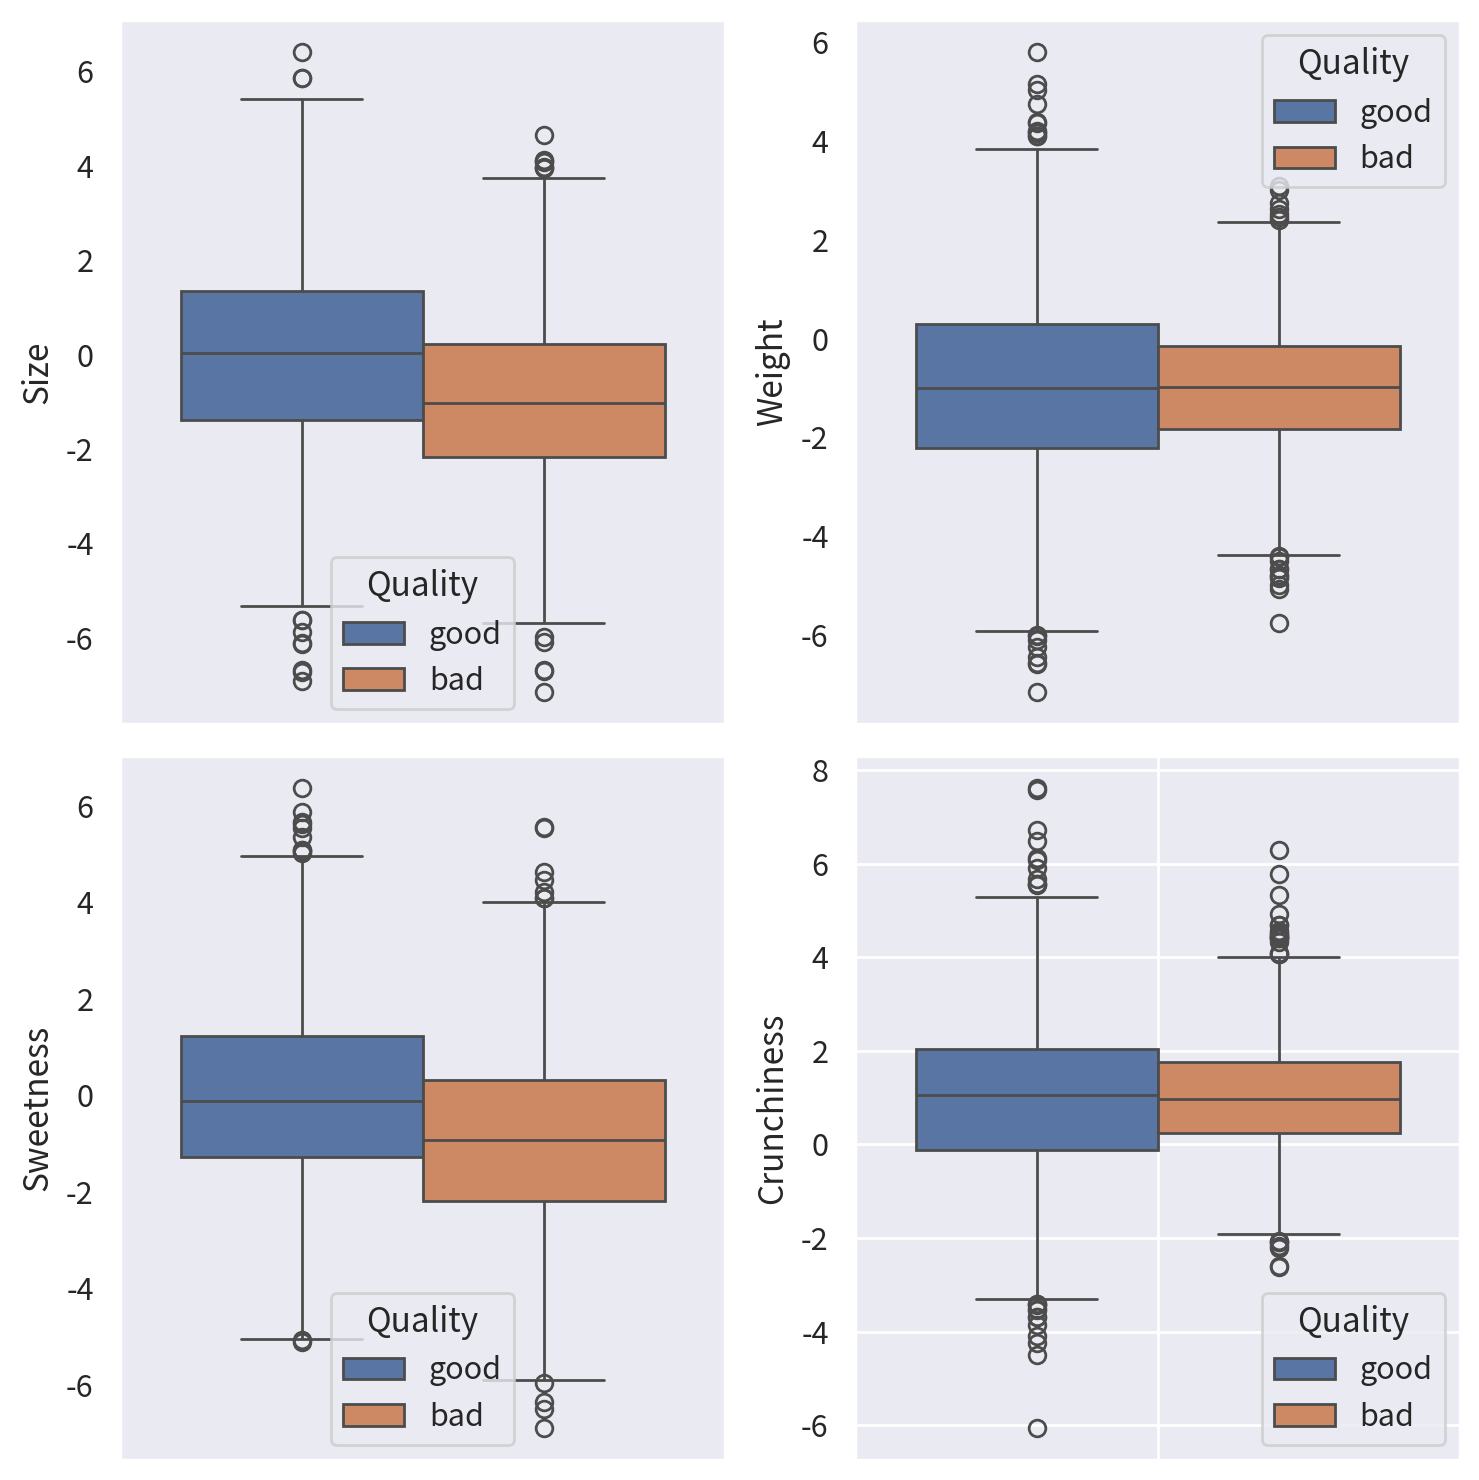

In [63]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1500             #그래프 가로 크기
height_px = 1500             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 2                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.boxplot(data=df, y='Size' ,hue='Quality',orient='v', ax=ax[0,0])
sb.boxplot(data=df, y='Weight' ,hue='Quality',orient='v', ax=ax[0,1])
sb.boxplot(data=df, y='Sweetness' ,hue='Quality',orient='v', ax=ax[1,0])
sb.boxplot(data=df, y='Crunchiness' ,hue='Quality',orient='v', ax=ax[1,1])


# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
plt.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

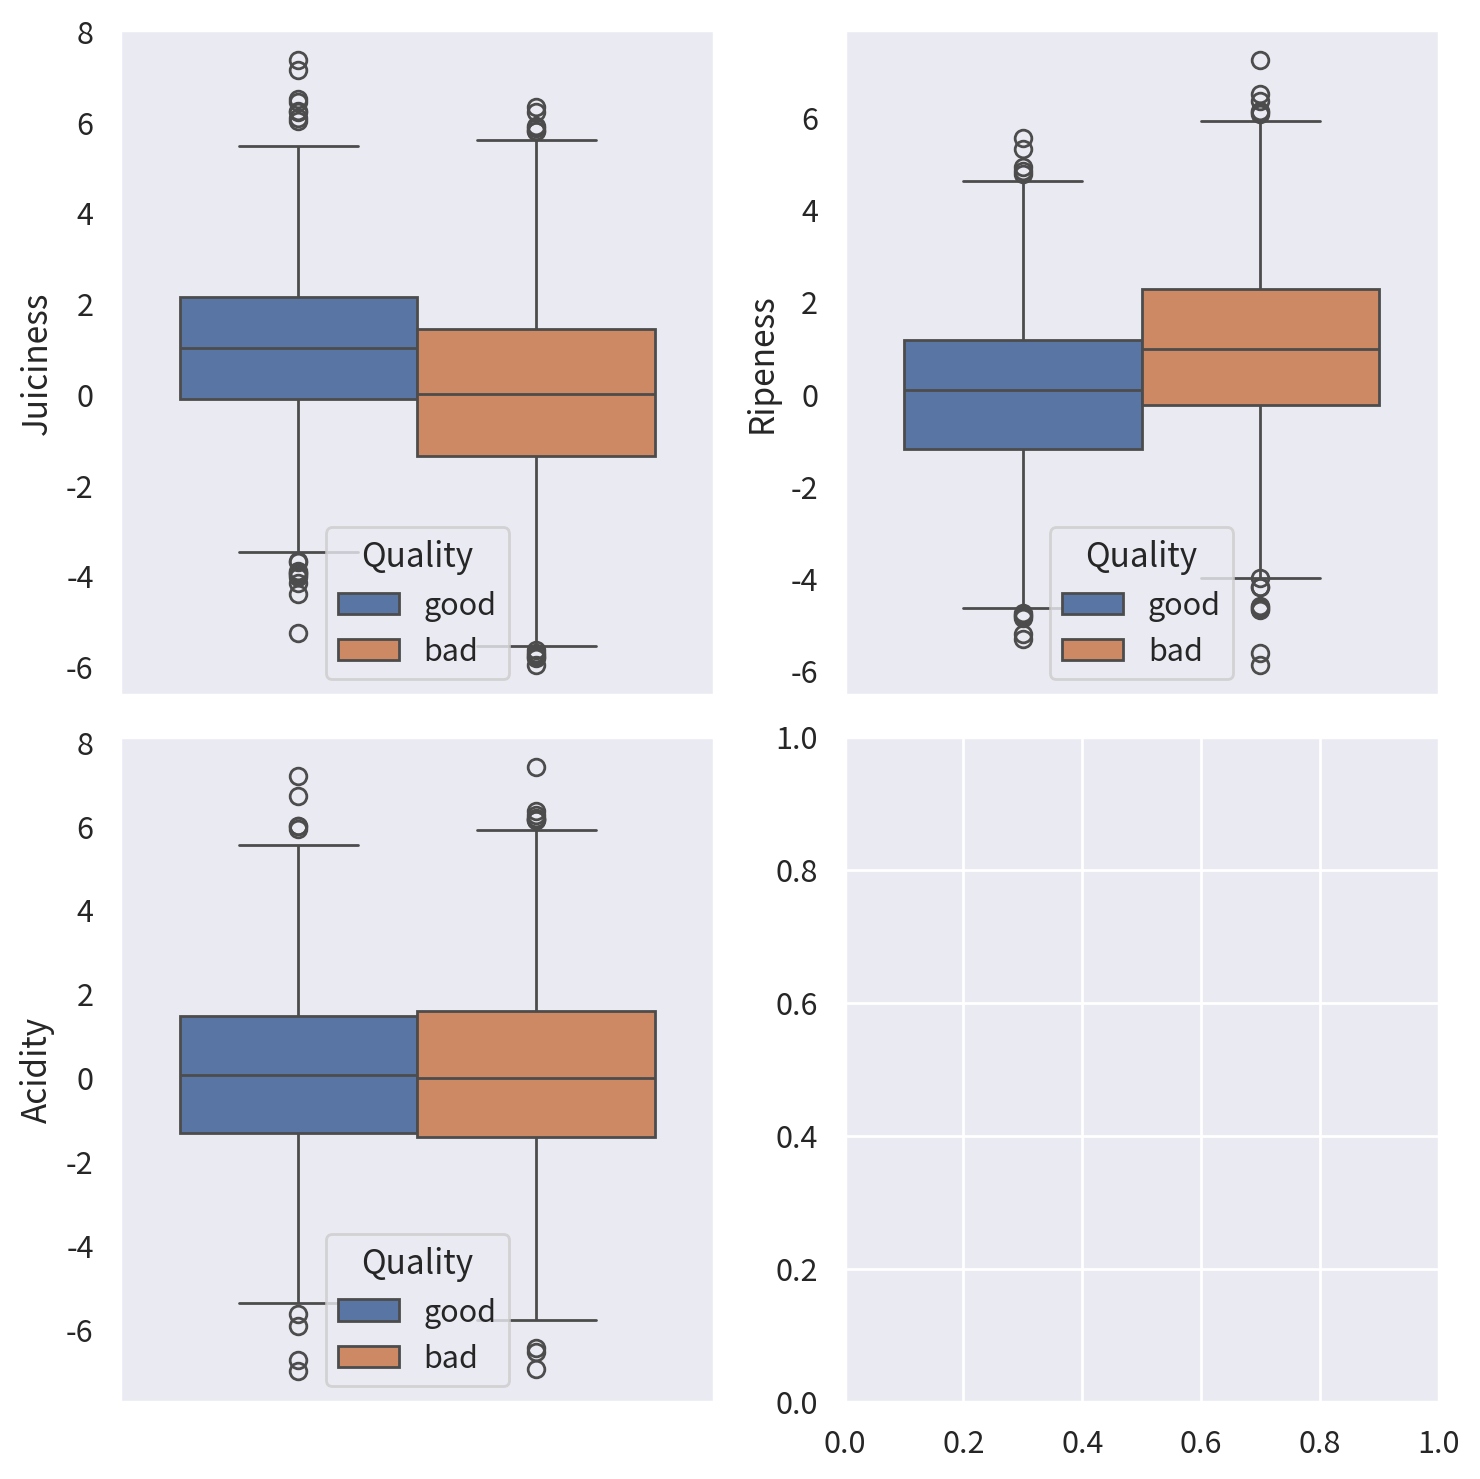

In [64]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1500             #그래프 가로 크기
height_px = 1500             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 2                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.boxplot(data=df, y='Juiciness' ,hue='Quality',orient='v', ax=ax[0,0])
sb.boxplot(data=df, y='Ripeness' ,hue='Quality',orient='v', ax=ax[0,1])
sb.boxplot(data=df, y='Acidity' ,hue='Quality',orient='v', ax=ax[1,0])


# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
plt.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

In [75]:
# Quality에 따른 중앙값 차이 계산 후 중앙값 차이가 큰 순서대로 출력
median = df.groupby('Quality').median()
# median.head()
median_diff = abs(median.loc['bad'] - median.loc['good'])
# median_diff
median_diff_sorted = median_diff.sort_values(ascending=False)
median_diff_sorted.round(2)

A_id           17.00
Size            1.05
Juiciness       1.02
Ripeness        0.87
Sweetness       0.80
Crunchiness     0.07
Acidity         0.07
Weight          0.02
dtype: float64

- 중앙값 차이가 분명한 변수 : 
    - Size, Sweetness, Juiciness, Ripeness
- 중앙값 차이가 분명하지 않은 변수 :
    - Weight, Crunchness, Acidity
- 분류에 도움이 될 것 같은 변수 : 
    - Size, Sweetness, Juiciness, Ripness (중앙값 차이가 분명한 변수)
    - 중앙값 차이가 1이 넘는 Size, Juiciness는 분류에 도움이 될 것 같다.

### 5단계. 변수 간 관계 탐색 - 변수들은 서로 독립적일까?
- 1. 연속형 변수들의 상관계수를 계산하자.
- 2. 상관행렬을 히트맵으로 시각화하자.
- 3. 상관이 높은 변수들을 동시에 사용할 때의 문제점을 고민해보자.

선형성을 페어플롯으로 형태 확인

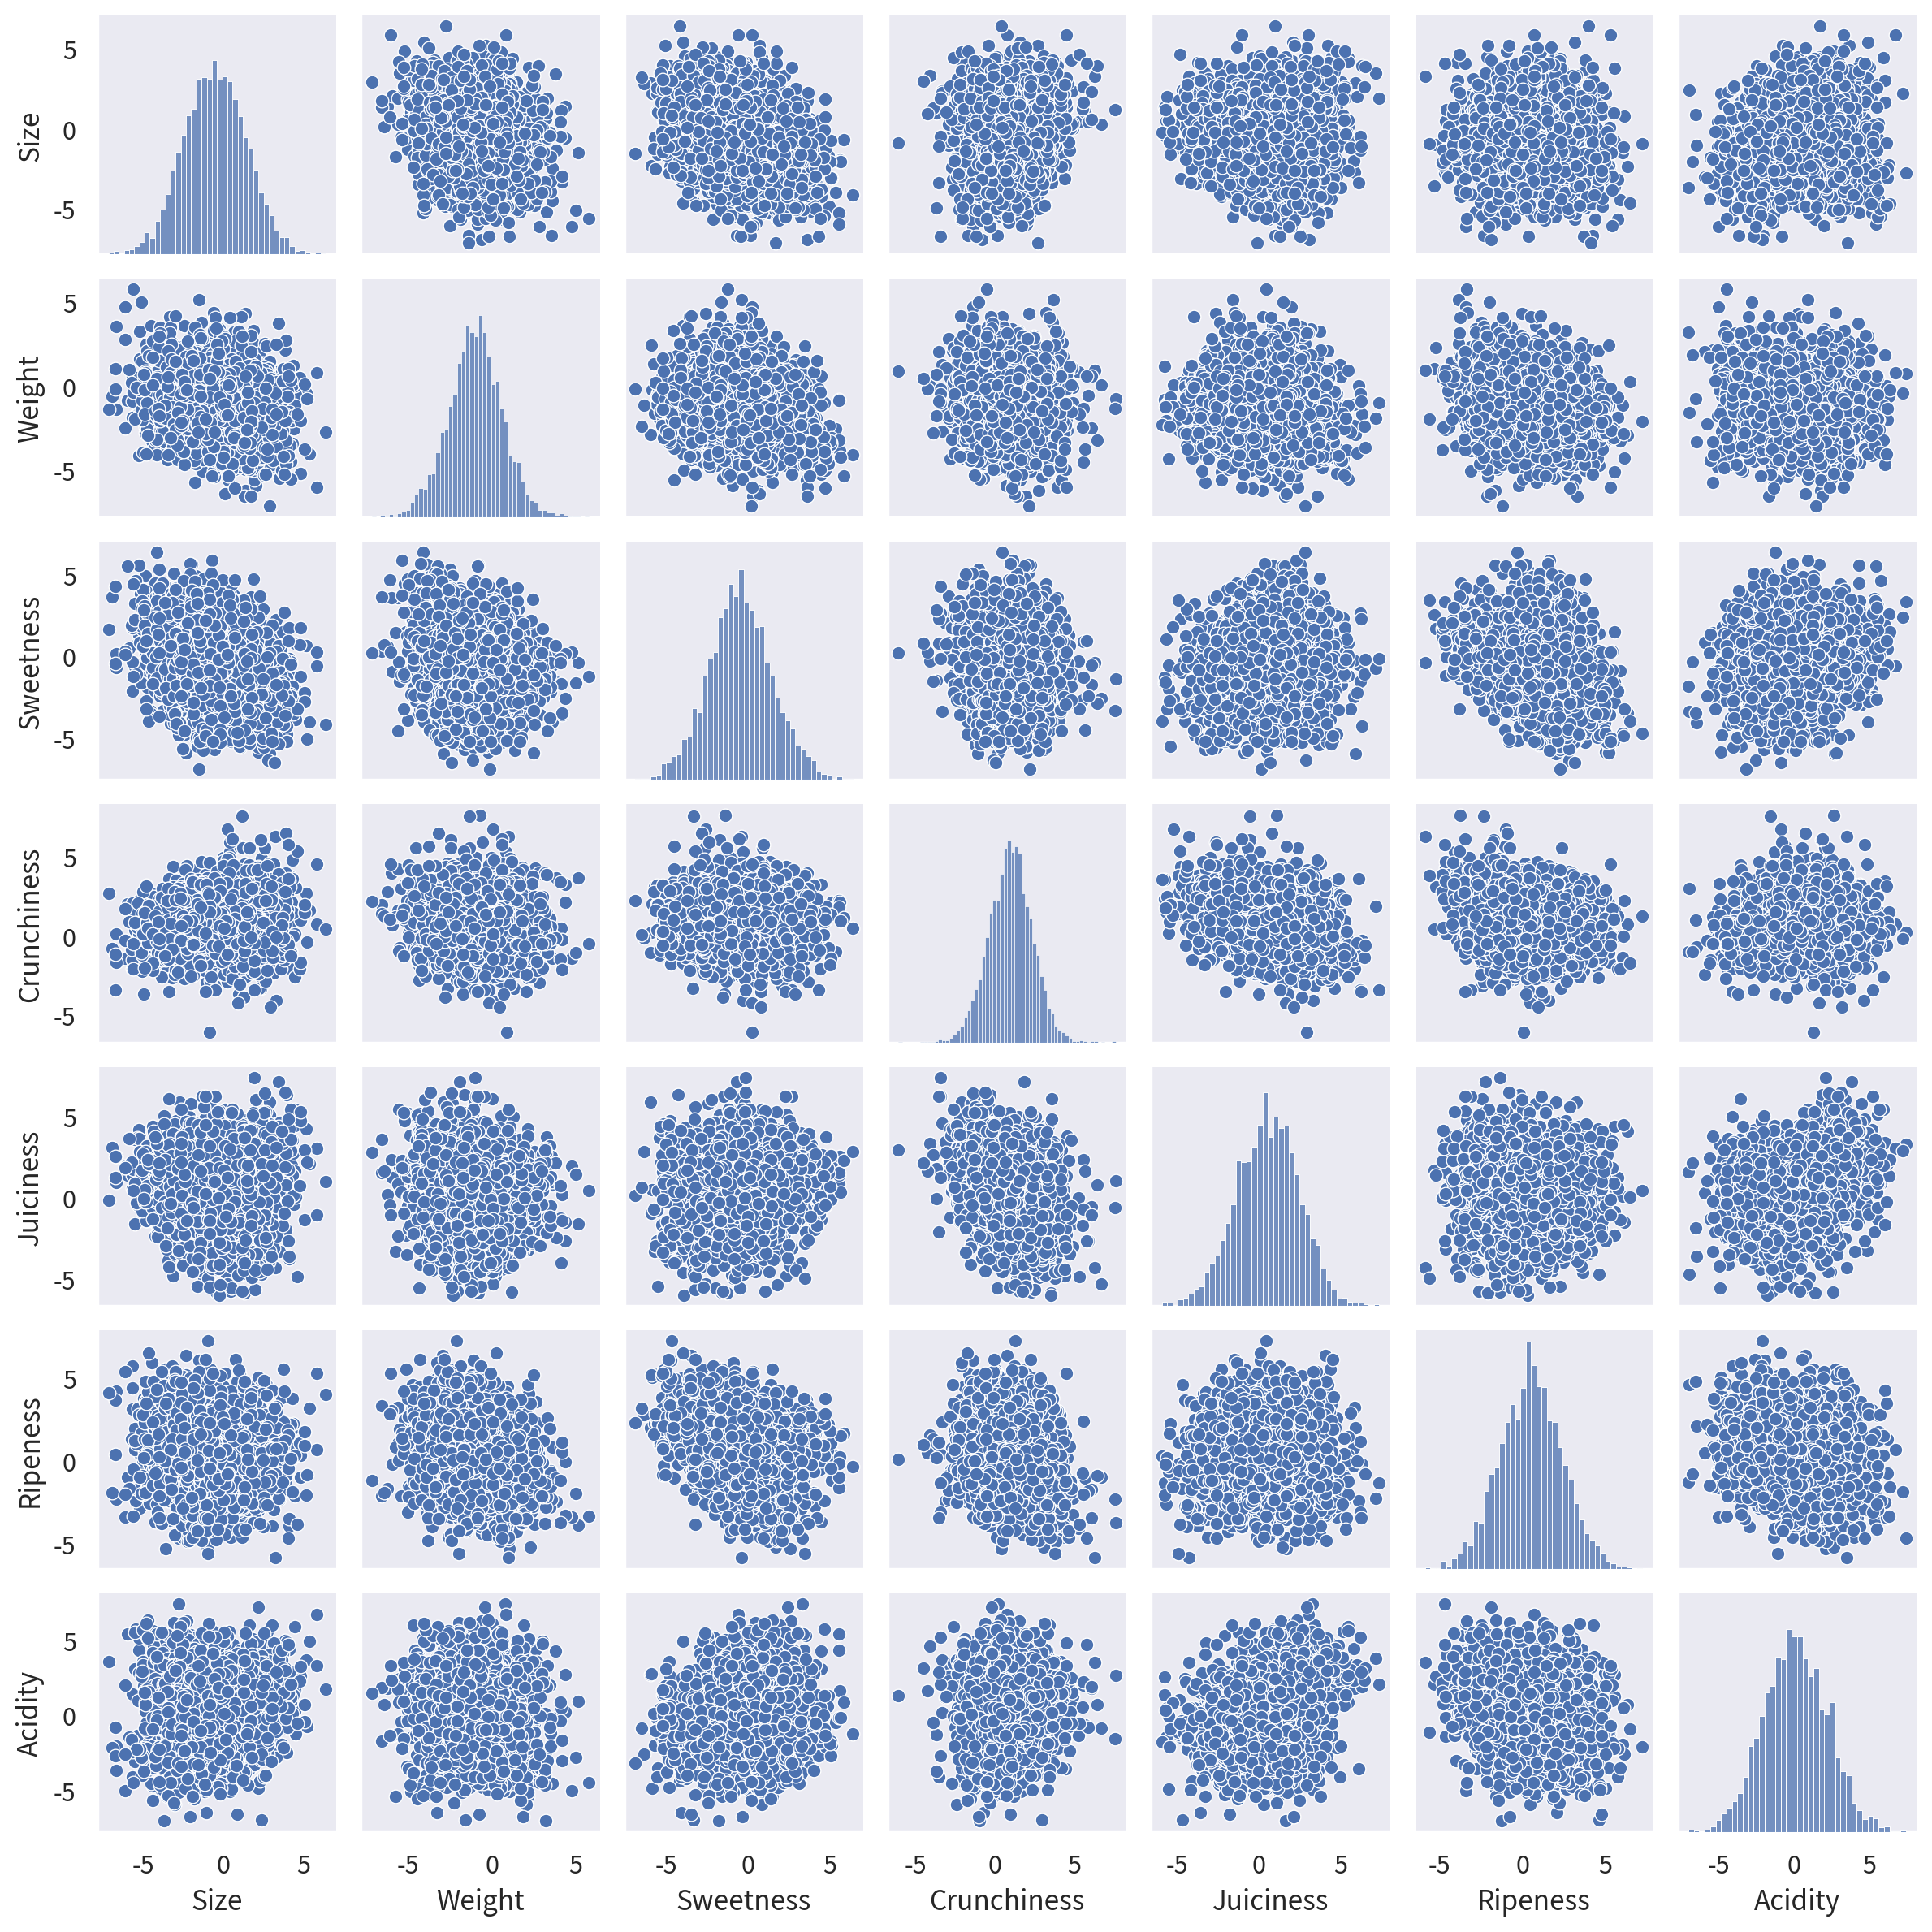

In [79]:
# df2는 연속형 변수만 있는 데이터프레임
# df3는 A_id 컬럼 제외
df3 = df2.drop(columns=['A_id'])
width_px = 2400
height_px = 2400
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.pairplot(data=df3, diag_kind='hist')
g.fig.set_size_inches(figsize)
g.fig.set_dpi(my_dpi)

plt.tight_layout()
plt.show()
plt.close()

이상치 요약

In [81]:
skew_outlier={}
for col in df3.columns:
    temp = df3[col].dropna()
    skew_original = temp.skew()
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    skew_outlier[col]= {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z| > 3)': outlier_count
    }
skew_outlier_df=DataFrame(skew_outlier).T
skew_outlier_df

,original_skew,log_skew,outliers(|z| > 3)
Size,-0.002437,-0.829367,10.0
Weight,0.003102,-0.826672,21.0
Sweetness,0.083850,-0.741892,10.0
Crunchiness,0.000230,-0.795241,29.0
Juiciness,-0.113421,-1.034189,16.0
Ripeness,-0.008764,-0.800417,8.0
Acidity,0.055783,-0.774239,8.0


모든 컬럼에 이상치는 존재하는듯

상관분석 수행

In [82]:
rows = []

for a, b in combinations(df3.columns,2):
    x = df3[a]
    y = df3[b]

    # [1] 선형성 확인(Ramsey RESET)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    reset = linear_reset(model, power=2, use_f=True)
    linearity_ok = reset.pvalue>0.05

    # [2] 이상치 존재 여부(|z| > 3 기준)
    a_flag = skew_outlier_df.loc[a, 'outliers(|z| > 3)'] >0
    b_flag = skew_outlier_df.loc[b, 'outliers(|z| > 3)'] >0
    outlier_flag = a_flag or b_flag

    # [3] 상관계수 선택 및 계산
    if linearity_ok and not outlier_flag:
        chosen = 'pearson'
        corr, pval = pearsonr(x,y)
    else:
        chosen = 'spearman'
        corr,pval = spearmanr(x,y)

    # [4] 유의성 판단(p <= 0.05)
    significant = pval <= 0.05

    # [5] 상관 강도 계산
    abs_r = abs(corr)
    if abs_r >= 0.80:
        strength = 'Very strong'
    elif abs_r >= 0.60:
        strength = 'Strong'
    elif abs_r >= 0.40:
        strength = 'Medium'
    elif abs_r >= 0.20:
        strength = 'Weak'
    else:
        strength = 'Very weak'
    
    # [6] 행 추가
    rows.append({
        "var_a": a,
        "var_b": b,
        "linearity": linearity_ok,
        "outlier_flag": outlier_flag,
        "chosen": chosen,
        "corr": corr,
        "pval": pval,
        "significant": significant,
        "strength": strength
    })

summary_df = DataFrame(rows)
summary_df

,var_a,var_b,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,Size,Weight,True,True,spearman,-0.144268,4.752499e-20,True,Very weak
1,Size,Sweetness,True,True,spearman,-0.310476,4.062856e-90,True,Weak
2,Size,Crunchiness,False,True,spearman,0.171818,7.038392e-28,True,Very weak
3,Size,Juiciness,False,True,spearman,-0.031881,4.378070e-02,True,Very weak
4,Size,Ripeness,False,True,spearman,-0.154780,7.171387e-23,True,Very weak
5,Size,Acidity,False,True,spearman,0.209998,4.185775e-41,True,Weak
6,Weight,Sweetness,False,True,spearman,-0.119883,2.802006e-14,True,Very weak
7,Weight,Crunchiness,True,True,spearman,-0.087117,3.418624e-08,True,Very weak
8,Weight,Juiciness,True,True,spearman,-0.090611,9.425551e-09,True,Very weak
9,Weight,Ripeness,False,True,spearman,-0.244340,1.858589e-55,True,Weak


- 1. Size 관련 변수들
    - Weight의 경우 이상치가 존재하여 스피어만 상관계수 적용, 매우 약한 음의 단조 관계 (p = -0.14, p<0.001)가 나타남. 
    - Sweetness의 경우 이상치가 존재하여 스피어만 상관계수 적용, 약한 음의 단조 관계 (p = -0.31, p<0.001)가 나타남. ~

상관행렬

              Acidity  Crunchiness  Juiciness  Ripeness      Size  Sweetness  \
Acidity      1.000000     0.073556   0.230778 -0.194695  0.209998   0.072026   
Crunchiness  0.073556     1.000000  -0.236538 -0.183677  0.171818  -0.017346   
Juiciness    0.230778    -0.236538   1.000000 -0.124169 -0.031881   0.097540   
Ripeness    -0.194695    -0.183677  -0.124169  1.000000 -0.154780  -0.254604   
Size         0.209998     0.171818  -0.031881 -0.154780  1.000000  -0.310476   
Sweetness    0.072026    -0.017346   0.097540 -0.254604 -0.310476   1.000000   
Weight       0.030479    -0.087117  -0.090611 -0.244340 -0.144268  -0.119883   

               Weight  
Acidity      0.030479  
Crunchiness -0.087117  
Juiciness   -0.090611  
Ripeness    -0.244340  
Size        -0.144268  
Sweetness   -0.119883  
Weight       1.000000  


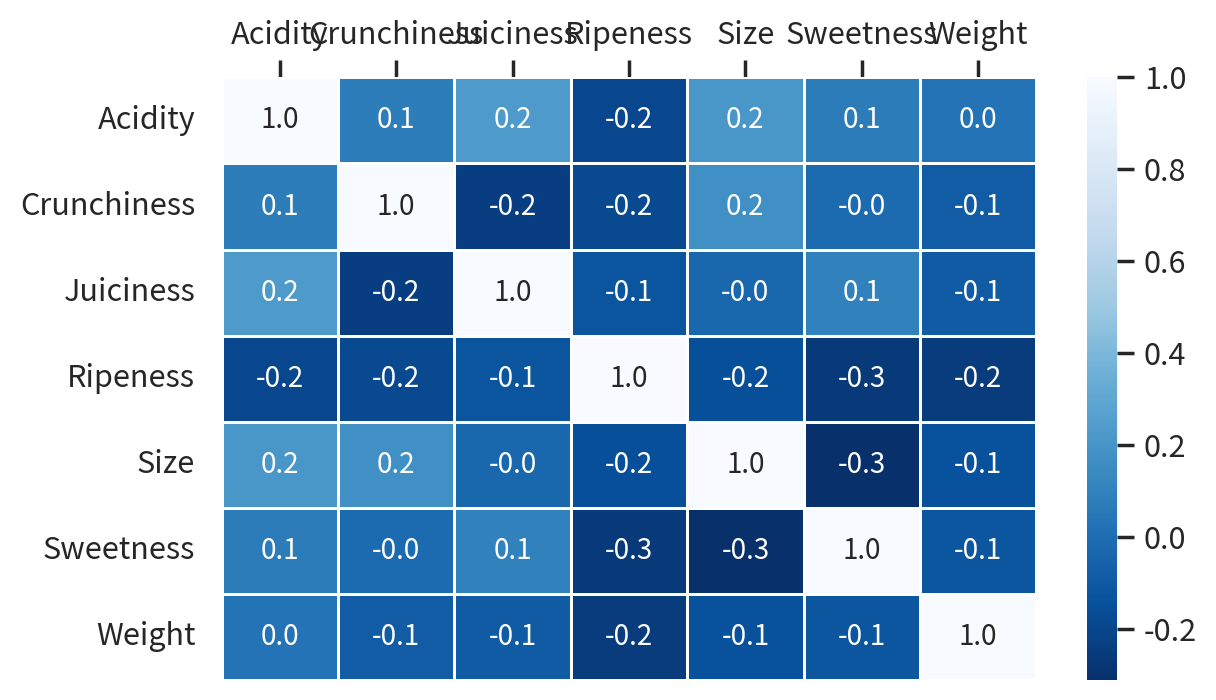

In [86]:
# 1) 등장하는 모든 변수 목록 추출
vars = sorted(set(summary_df['var_a']).union(summary_df['var_b']))

# 2) 빈 상관행렬 생성 (NaN으로 초기화)
corr_matrix = DataFrame(np.nan, index=vars, columns=vars)

# 3) summary_df 내용을 반영하여 대칭 행렬 채우기
for _, row in summary_df.iterrows():
    a, b, r = row['var_a'], row['var_b'], row['corr']
    corr_matrix.loc[a, b] = r
    corr_matrix.loc[b, a] = r # 대칭

# 4) 대각선 (diagonal)을 1로 설정
np.fill_diagonal(corr_matrix.values, 1)
print(corr_matrix)
# corr_matrix
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig,ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.heatmap(data=corr_matrix, annot=True, fmt='0.1f', linewidth=0.5, cmap='Blues_r', annot_kws={'size':10})
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()

plt.tight_layout()
plt.show()
plt.close()


- 0.4 이상으로 넘어가는 값이 없음
- 변수들간 독립적이다.
- 상관이 높은 변수들을 동시에 사용하게 되면 우리가 얻고자 하는 종속 변수의 값이 이상하게 나옴 - 다중공선성 문제
    - 독립변수끼리 상관이 있으면 모델의 신뢰도를 낮춤
    - 통계적으로 유의미하다고 볼 수 없음.

### 6단계. EDA를 바탕으로 한 모델 설계 - 그려본 결과를 어떻게 모델로 옮길까?
- 1. 지금까지의 EDA 결과를 간단히 요약하자.
- 2. 사용할 독립변수를 최종 선정하자.
- 3. 각 변수 선택에 대해 다음 문장을 완성하자.
    - "이 변수는 EDA 단계에서 oo한 패턴을 보였기 때문에 품질을 설명하는 데 도움이 될 것으로 판단했다."

- 1. 지금까지의 EDA 결과를 요약
    1. 분류에 사용할 변수를 정했음
        - 중앙값을 기준으로 차이가 있는 변수를 사용하기로 함
        - Size, Sweetness, Juiciness, Ripness (중앙값 차이가 분명한 변수)
    2. 변수들간의 상관 분석을 통해 변수 간 독립성을 확인함
        - 상관성이 크게 없는 것으로 확인됨.
    3. 데이터의 분포를 확인함
        - 모든 컬럼의 그래프가 정규분포성을 띄고 있음을 확인함.
        - 이상치는 존재하지만, 결측치와 왜도는 없는 것으로 확인됨.
---
- 2. 사용할 독립변수를 최종 선정
    - 위에서 정한 분류에 사용할 변수 사용
        - Size, Sweetness, Juiciness, Ripness (중앙값 차이가 분명한 변수)

---
- 3. 각 변수 선택에 대해 다음 문장을 완성하자.
    - "이 변수는 EDA 단계에서 중앙값을 기준으로 차이가 분명했기 때문에 품질을 설명하는 데 도움이 될 것으로 판단했다."


### 7단계. 로지스틱 회귀 모델 적합 - 확률로 말하는 분류기
- 1. 로지스틱 회귀 모델을 적합하자.
- 2. 회귀계수의 부호와 크기를 확인하자.
- 3. EDA에서 예상한 방향과 결과가 일치하는 지 비교하자.

In [ ]:
# 1. 로지스틱 회귀 모델 적합
# 로지스틱을 위한 참조
import statsmodels.api as sm

#로지스틱 결과 판별을 위한 참조
# -> 머신러닝 라이브러리를 미리 사용
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

# VIF 값을 계산하기 위한 참조
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
df = df.astype({'Quality':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   A_id         4000 non-null   int64   
 1   Size         4000 non-null   float64 
 2   Weight       4000 non-null   float64 
 3   Sweetness    4000 non-null   float64 
 4   Crunchiness  4000 non-null   float64 
 5   Juiciness    4000 non-null   float64 
 6   Ripeness     4000 non-null   float64 
 7   Acidity      4000 non-null   float64 
 8   Quality      4000 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 254.2 KB


In [ ]:
yname = 'Quality'                   #종속변수 이름

x = df.drop(yname, axis=1)      #독립변수만 추출(DataFrame)
print(x)
y = df[yname]                   #종속변수만 추출(Series)

x_input = sm.add_constant(x)        #독립변수에 상수항 추가

fit = sm.Logit(y, x_input).fit()
tbl1=fit.summary()
print(tbl1)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).